## Setup and Imports

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons, load_iris, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Random seed for reproducibility
np.random.seed(42)

print("✓ All imports successful!")

✓ All imports successful!


---
## Part 1: K-Means Clustering

### 1.1 Understanding K-Means

**Objective Function (Inertia/Within-Cluster Sum of Squares - WCSS):**

$$J = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$

Where:
- $k$ = number of clusters
- $C_i$ = cluster $i$
- $\mu_i$ = centroid of cluster $i$
- Goal: **Minimize** the total within-cluster variance

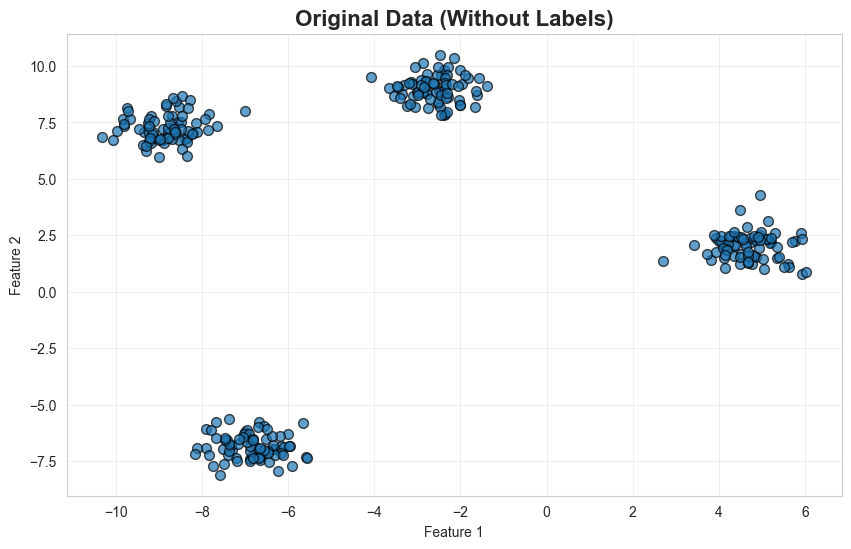

Dataset shape: (300, 2)
Number of samples: 300


In [10]:
# Generate synthetic data with clear clusters
X, y_true = make_blobs(n_samples=300, centers=4, n_features=2, 
                        cluster_std=0.6, random_state=42)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.7, edgecolors='k')
plt.title('Original Data (Without Labels)', fontsize=16, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")

### 1.2 Apply K-Means with Different K Values

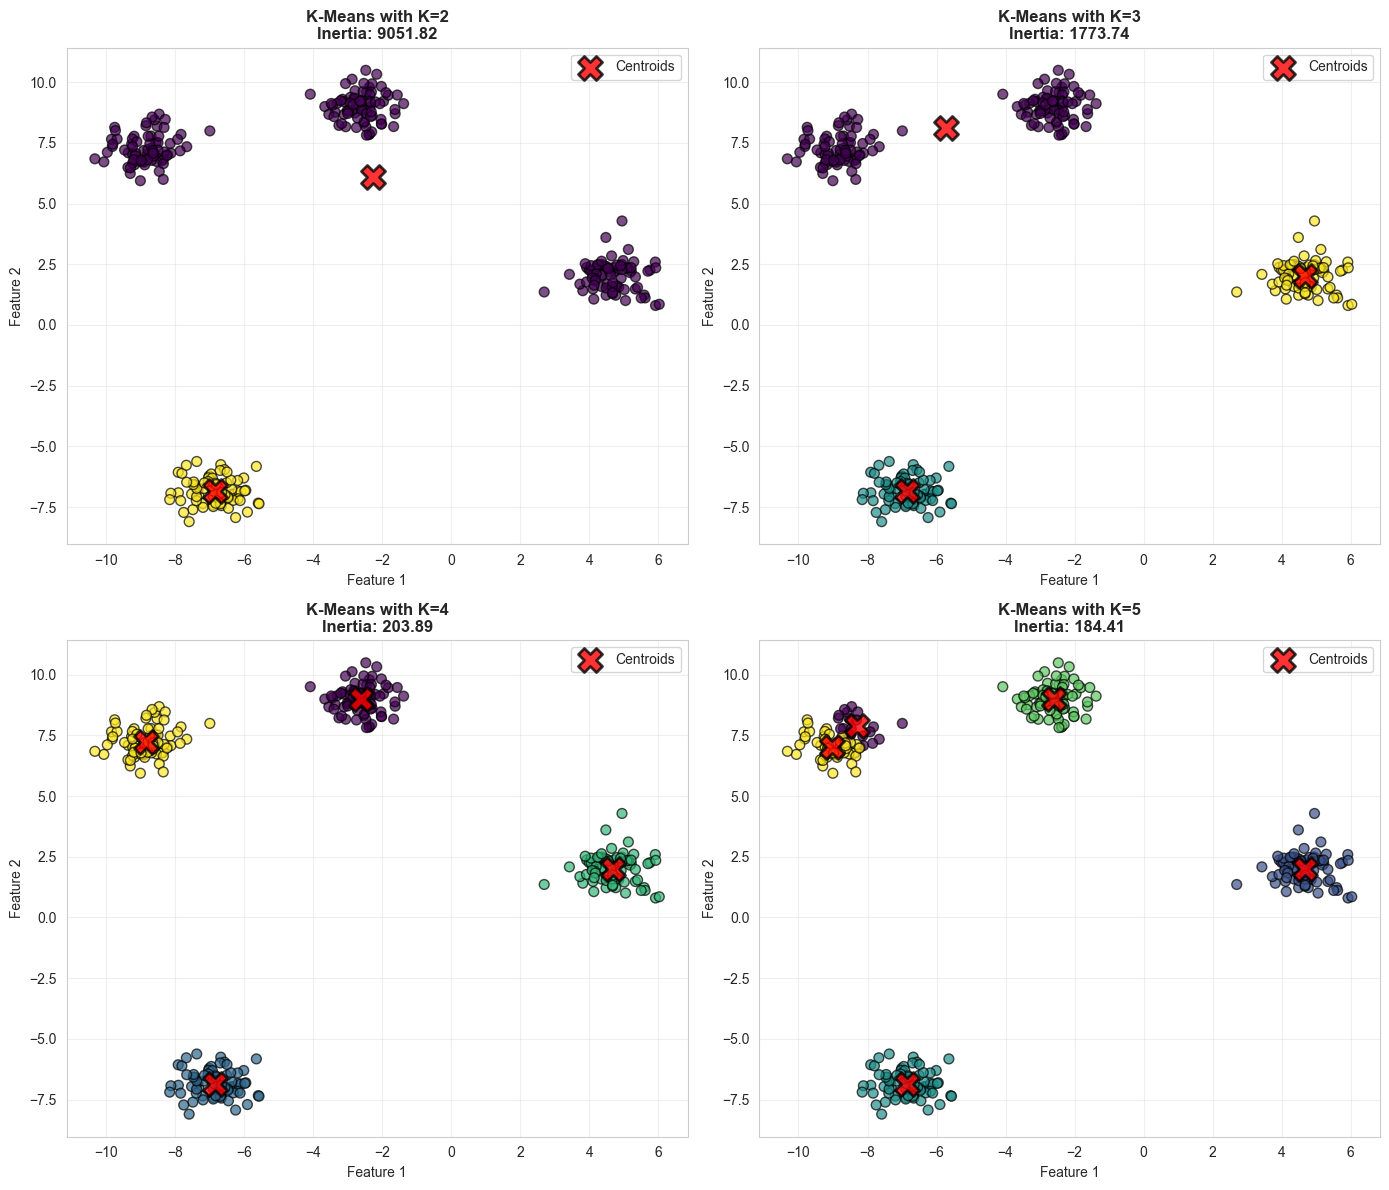

In [11]:
# Try different numbers of clusters
k_values = [2, 3, 4, 5]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, k in enumerate(k_values):
    # Fit K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    
    # Plot
    axes[idx].scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', 
                     alpha=0.7, edgecolors='k')
    axes[idx].scatter(centroids[:, 0], centroids[:, 1], 
                     c='red', s=300, alpha=0.8, marker='X', 
                     edgecolors='black', linewidths=2, label='Centroids')
    axes[idx].set_title(f'K-Means with K={k}\nInertia: {kmeans.inertia_:.2f}', 
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 1.3 Elbow Method - Finding Optimal K

The **Elbow Method** helps determine the optimal number of clusters by plotting the inertia (WCSS) against different K values. The "elbow" point suggests the optimal K.

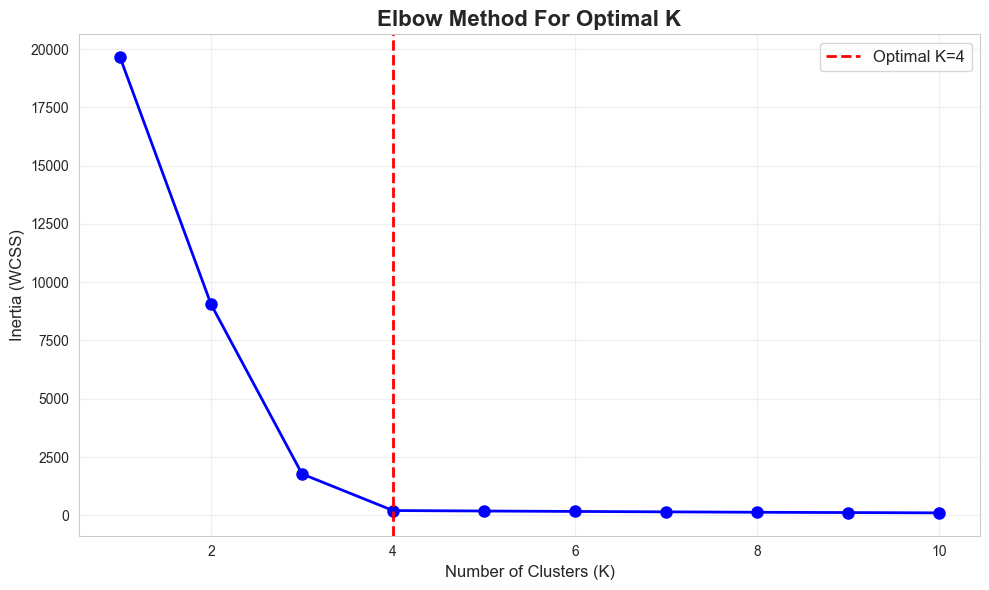

K=1: Inertia = 19652.40
K=2: Inertia = 9051.82
K=3: Inertia = 1773.74
K=4: Inertia = 203.89
K=5: Inertia = 184.41
K=6: Inertia = 165.72
K=7: Inertia = 148.07
K=8: Inertia = 129.73
K=9: Inertia = 117.92
K=10: Inertia = 104.54


In [12]:
# Calculate inertia for different K values
k_range = range(1, 11)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.title('Elbow Method For Optimal K', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Highlight the elbow point (K=4 in this case)
plt.axvline(x=4, color='red', linestyle='--', linewidth=2, label='Optimal K=4')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Print inertia values
for k, inertia in zip(k_range, inertias):
    print(f"K={k}: Inertia = {inertia:.2f}")

### 1.4 Silhouette Score Analysis

**Silhouette Score** measures how similar an object is to its own cluster compared to other clusters.

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Where:
- $a(i)$ = average distance to points in same cluster
- $b(i)$ = average distance to points in nearest cluster
- Score ranges from **-1 to 1** (higher is better)

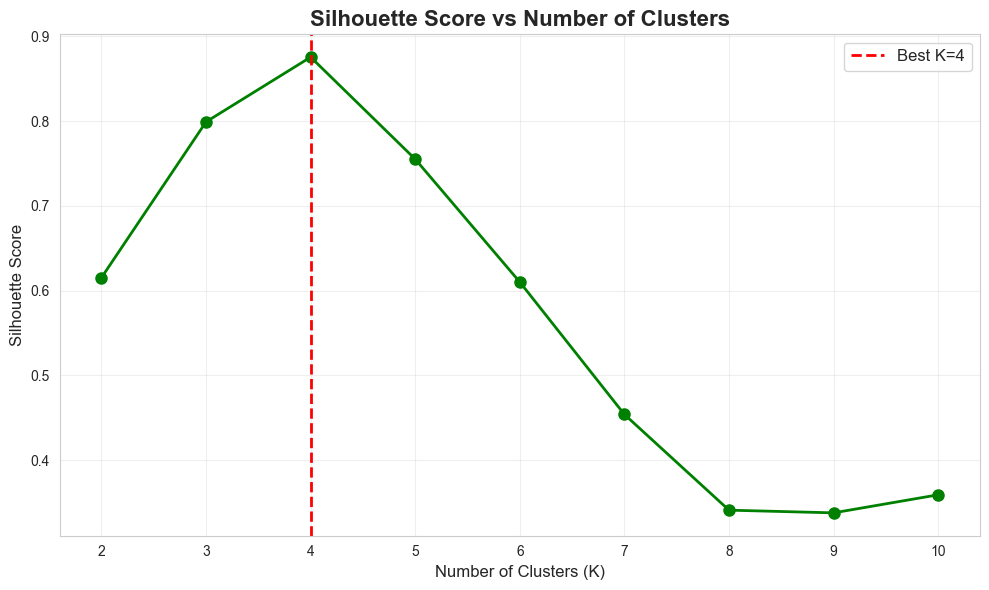

K=2: Silhouette Score = 0.615
K=3: Silhouette Score = 0.799
K=4: Silhouette Score = 0.876
K=5: Silhouette Score = 0.755
K=6: Silhouette Score = 0.610
K=7: Silhouette Score = 0.454
K=8: Silhouette Score = 0.341
K=9: Silhouette Score = 0.338
K=10: Silhouette Score = 0.359


In [13]:
# Calculate silhouette scores for different K values
k_range = range(2, 11)  # Silhouette score requires at least 2 clusters
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score vs Number of Clusters', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Highlight the best K
best_k = k_range[np.argmax(silhouette_scores)]
plt.axvline(x=best_k, color='red', linestyle='--', linewidth=2, 
           label=f'Best K={best_k}')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Print silhouette scores
for k, score in zip(k_range, silhouette_scores):
    print(f"K={k}: Silhouette Score = {score:.3f}")

### 1.5 Silhouette Analysis - Visual Representation

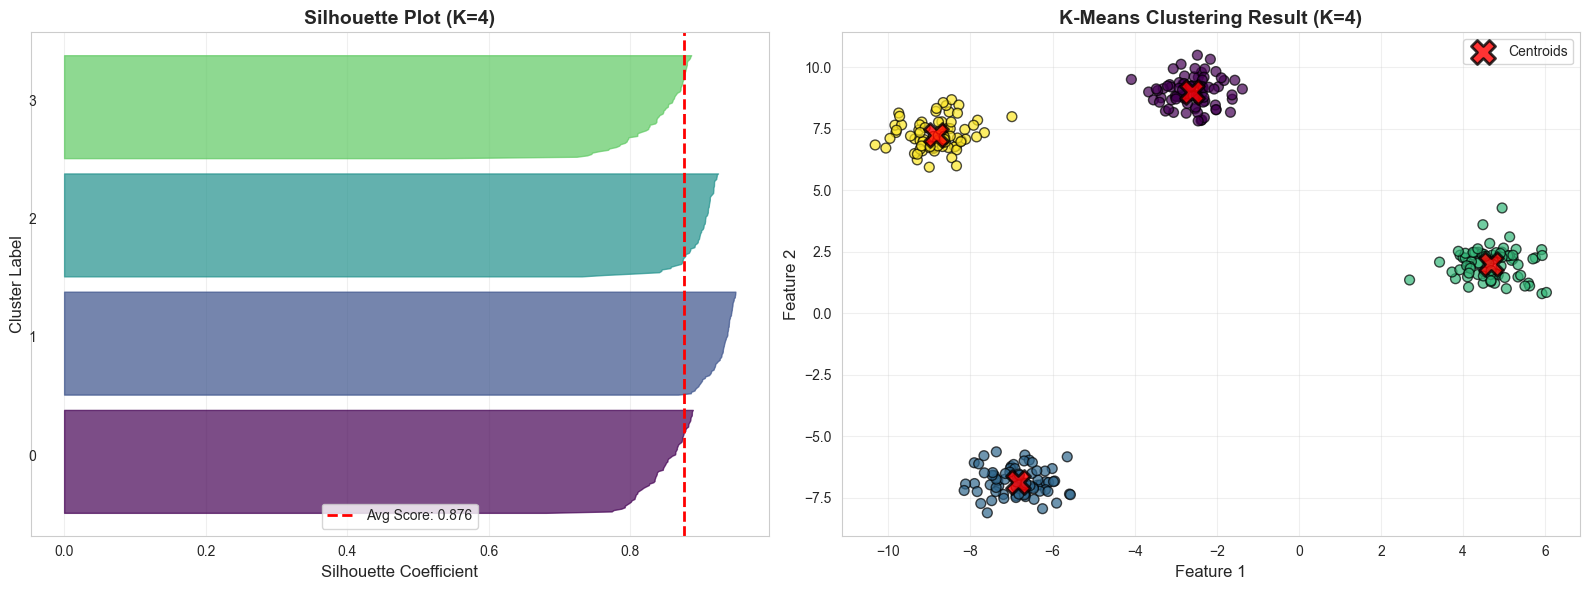

In [14]:
# Detailed silhouette analysis for K=4
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Calculate silhouette values for each sample
silhouette_vals = silhouette_samples(X, labels)
avg_score = silhouette_score(X, labels)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Silhouette plot
y_lower = 10
for i in range(k_optimal):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.viridis(float(i) / k_optimal)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title(f'Silhouette Plot (K={k_optimal})', fontsize=14, fontweight='bold')
ax1.set_xlabel('Silhouette Coefficient', fontsize=12)
ax1.set_ylabel('Cluster Label', fontsize=12)
ax1.set_yticks([])  # Remove y-axis ticks/scale
ax1.axvline(x=avg_score, color='red', linestyle='--', linewidth=2, 
           label=f'Avg Score: {avg_score:.3f}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Cluster visualization
colors = plt.cm.viridis(labels.astype(float) / k_optimal)
ax2.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', 
           alpha=0.7, edgecolors='k')
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           c='red', s=300, alpha=0.8, marker='X', 
           edgecolors='black', linewidths=2, label='Centroids')
ax2.set_title(f'K-Means Clustering Result (K={k_optimal})', fontsize=14, fontweight='bold')
ax2.set_xlabel('Feature 1', fontsize=12)
ax2.set_ylabel('Feature 2', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## Part 2: Hierarchical Clustering

### 2.1 Understanding Hierarchical Clustering

**Agglomerative (Bottom-up) Approach:**
1. Start with each point as its own cluster
2. Iteratively merge the closest clusters
3. Continue until all points are in one cluster

**Linkage Methods:**
- **Single**: Minimum distance between clusters
- **Complete**: Maximum distance between clusters
- **Average**: Average distance between all pairs
- **Ward**: Minimizes within-cluster variance

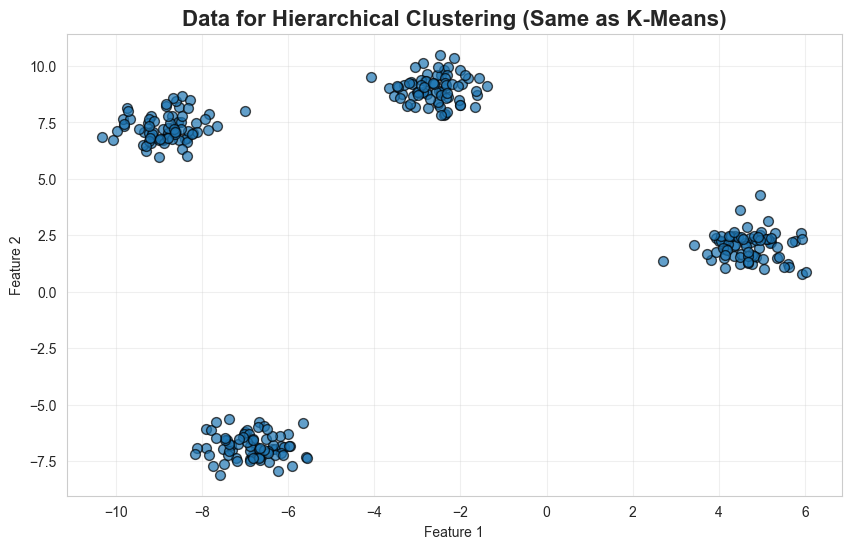

In [7]:
# Use the same data from K-Means example
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.7, edgecolors='k')
plt.title('Data for Hierarchical Clustering (Same as K-Means)', fontsize=16, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.show()

### 2.2 Dendrogram Visualization

A **dendrogram** is a tree diagram showing the hierarchical relationship between clusters.

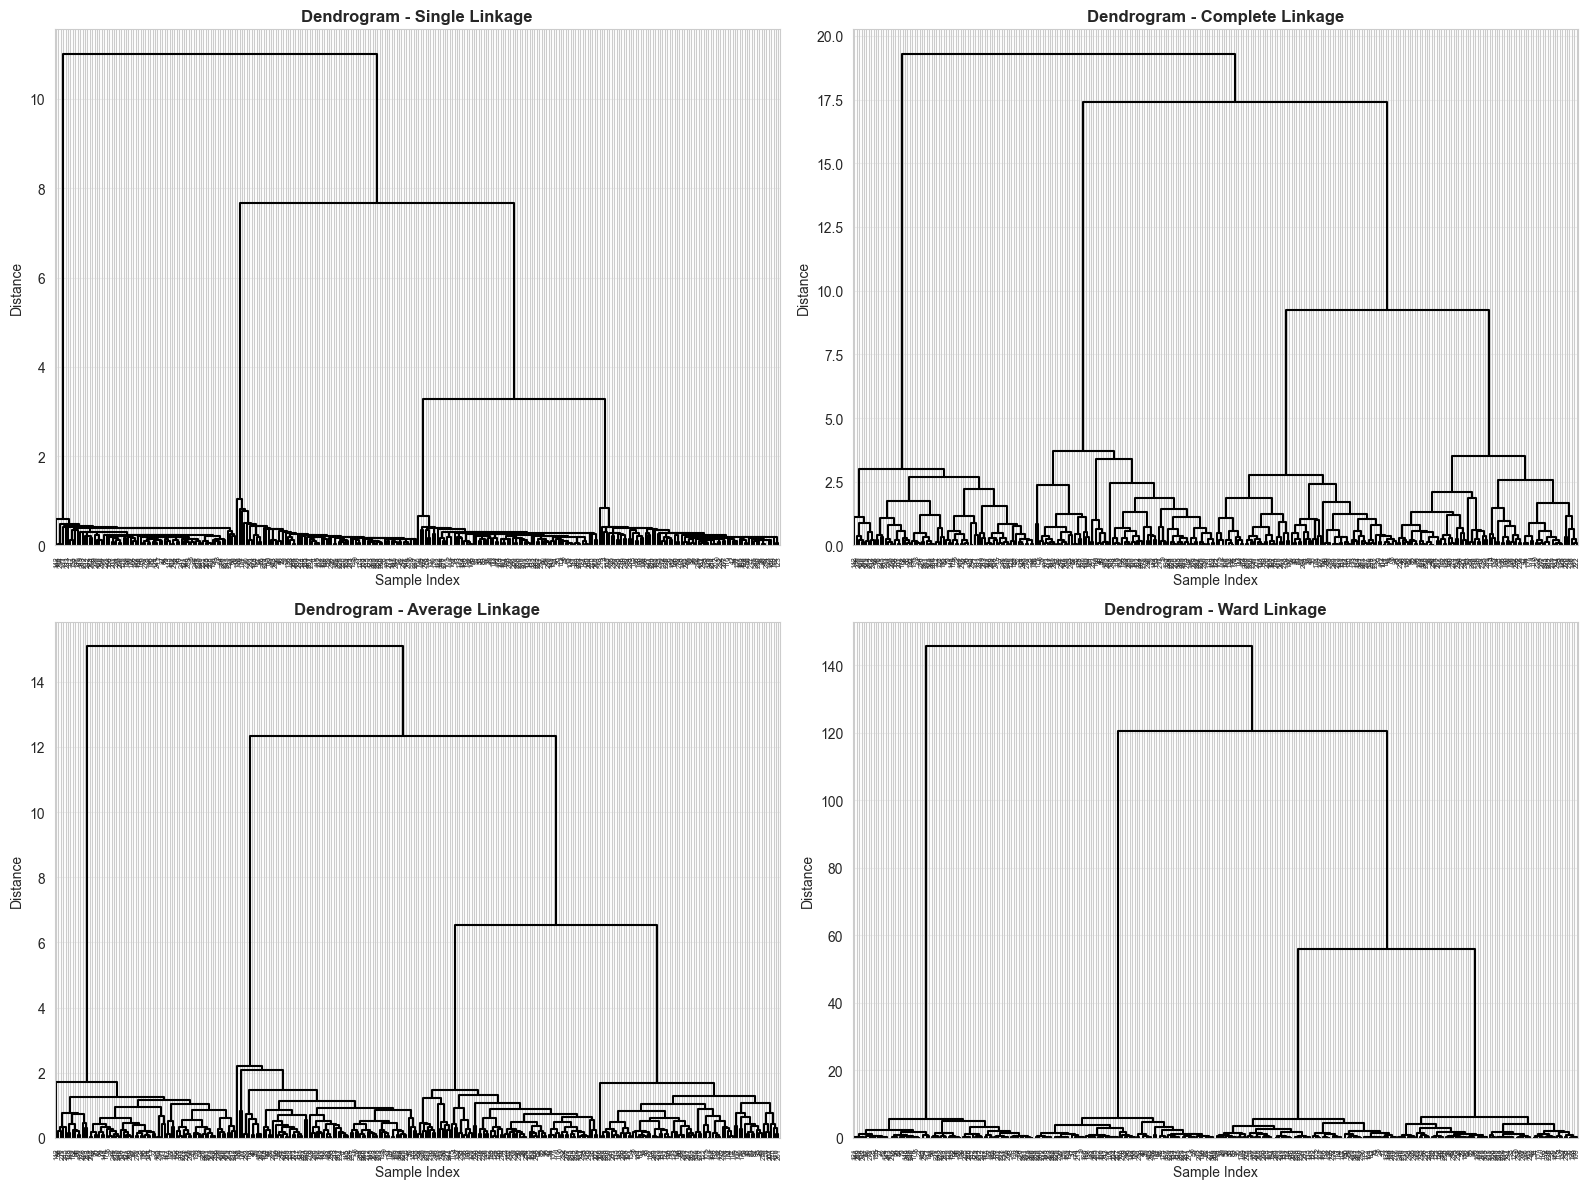

In [15]:
# Compute linkage matrix using the same data (X)
linkage_methods = ['single', 'complete', 'average', 'ward']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, method in enumerate(linkage_methods):
    # Compute linkage
    Z = linkage(X, method=method)
    
    # Plot dendrogram
    dendrogram(Z, ax=axes[idx], color_threshold=0, above_threshold_color='black')
    axes[idx].set_title(f'Dendrogram - {method.capitalize()} Linkage', 
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Sample Index')
    axes[idx].set_ylabel('Distance')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 2.3 Apply Agglomerative Clustering

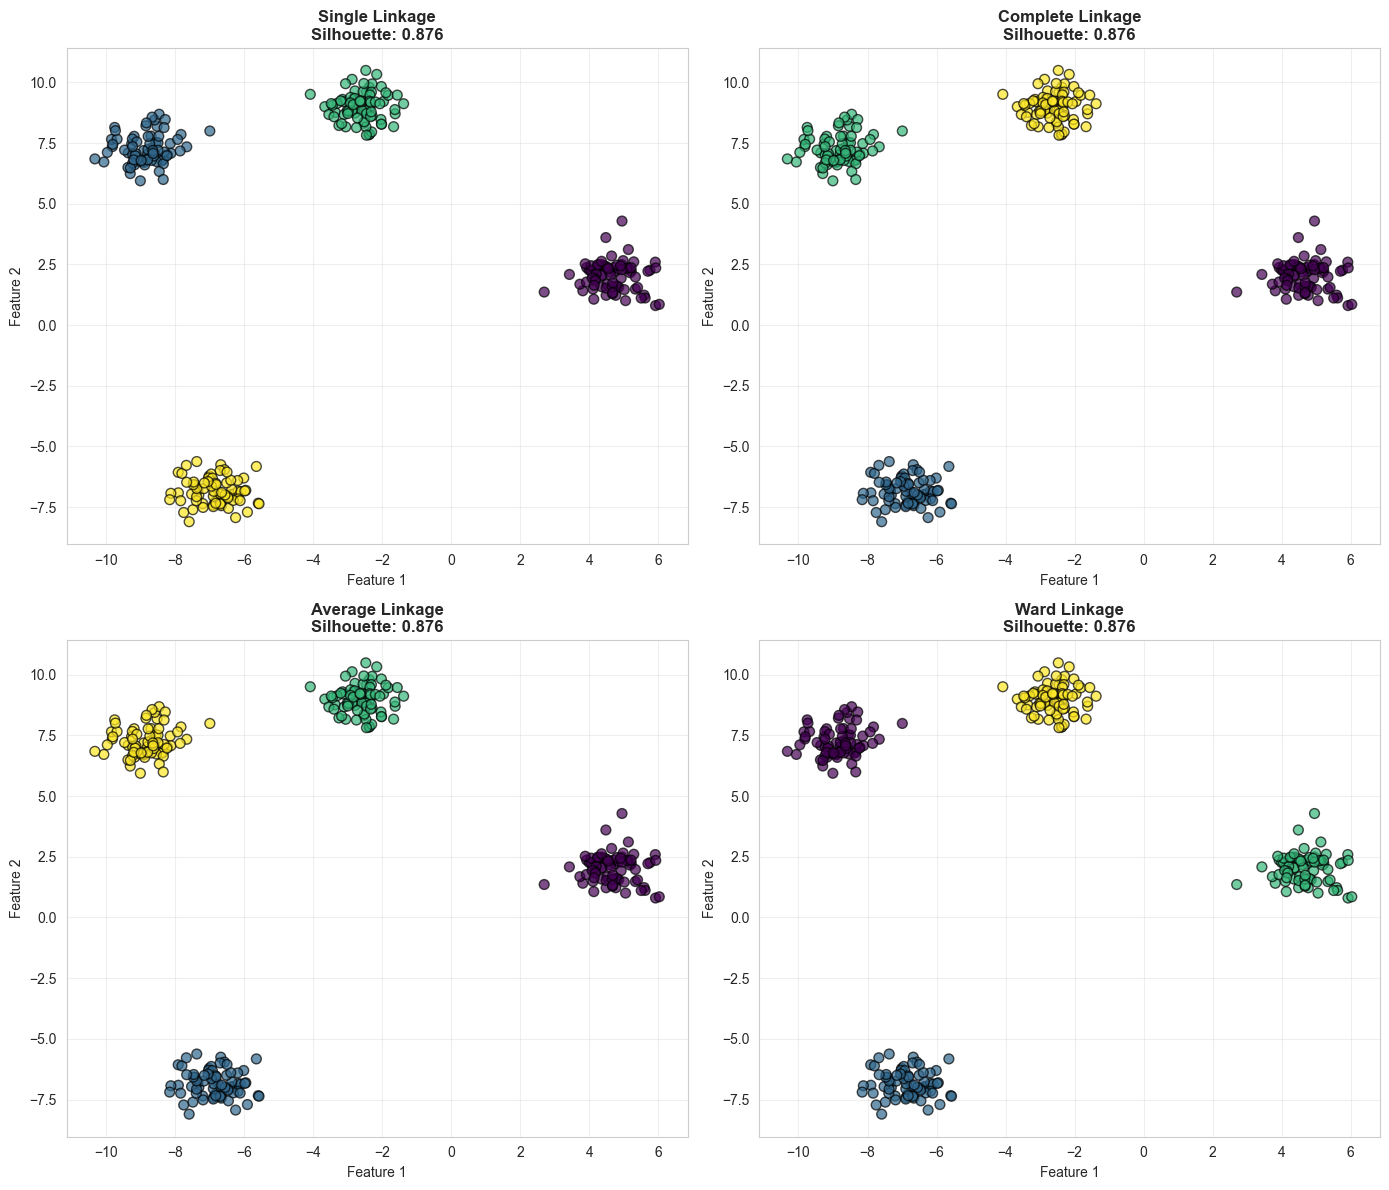

In [16]:
# Apply hierarchical clustering with different linkage methods using same data (X)
n_clusters = 4  # Using 4 to match K-Means optimal

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, method in enumerate(linkage_methods):
    # Fit hierarchical clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    labels = hc.fit_predict(X)
    
    # Calculate silhouette score
    sil_score = silhouette_score(X, labels)
    
    # Plot
    axes[idx].scatter(X[:, 0], X[:, 1], c=labels, s=50, 
                     cmap='viridis', alpha=0.7, edgecolors='k')
    axes[idx].set_title(f'{method.capitalize()} Linkage\nSilhouette: {sil_score:.3f}', 
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.4 Dendrogram with Color Threshold

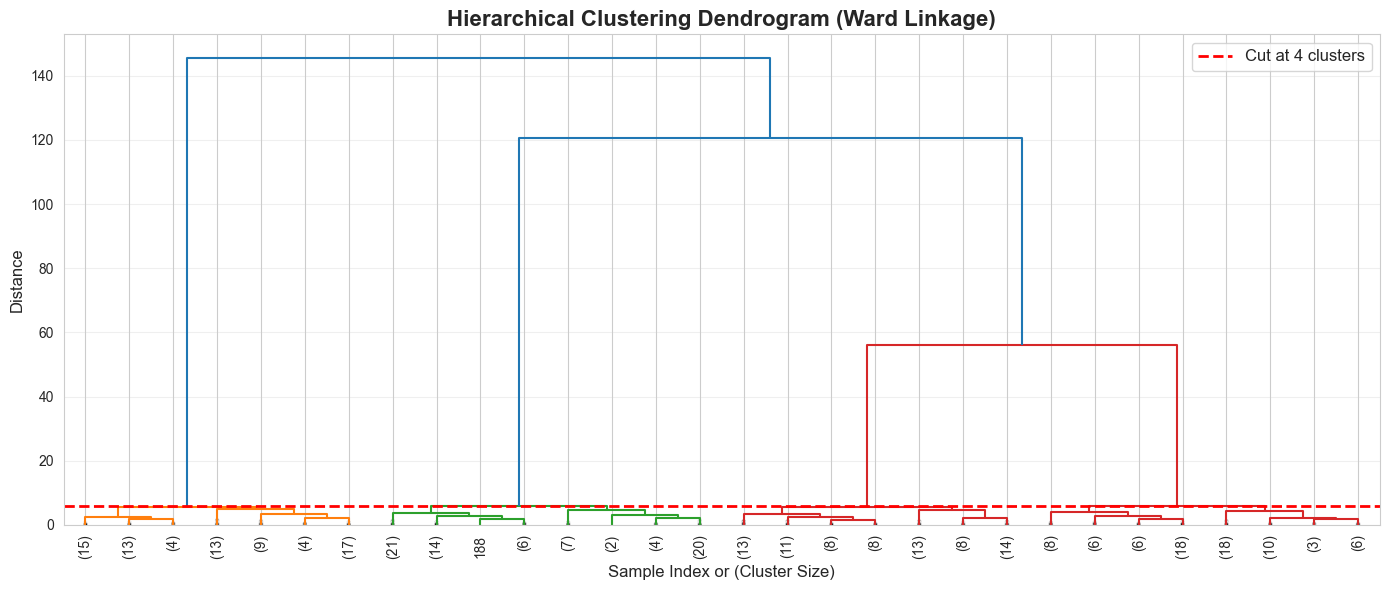

In [17]:
# Create dendrogram with color-coded clusters using same data (X)
Z = linkage(X, method='ward')

plt.figure(figsize=(14, 6))
dendrogram(Z, truncate_mode='lastp', p=30, 
          leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', 
         fontsize=16, fontweight='bold')
plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=6, color='r', linestyle='--', linewidth=2, 
           label='Cut at 4 clusters')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

---
## Part 3: Dimensionality Reduction

### 3.1 Principal Component Analysis (PCA)

**PCA** finds orthogonal directions (principal components) that maximize variance in the data.

**Steps:**
1. Standardize the data
2. Compute covariance matrix
3. Calculate eigenvectors and eigenvalues
4. Select top k eigenvectors (principal components)

In [18]:
# Load Iris dataset (4 features)
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_iris)

print(f"Original data shape: {X_iris.shape}")
print(f"Features: {feature_names}")
print(f"Target classes: {iris.target_names}")

Original data shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


### 3.2 Apply PCA and Explained Variance

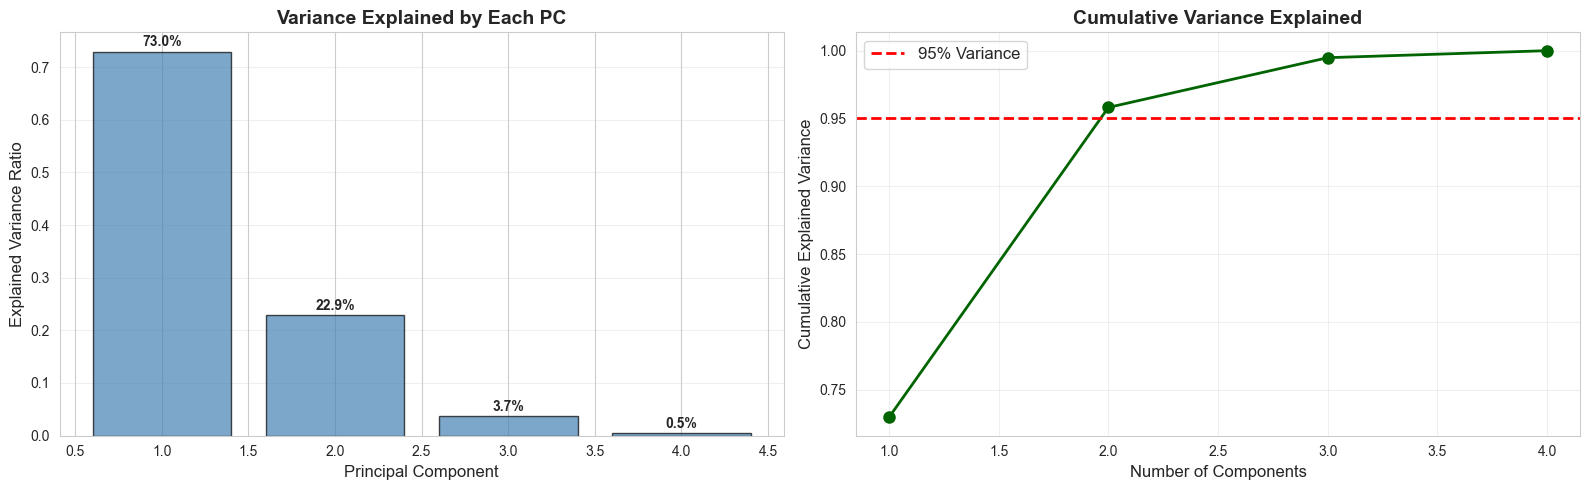


Explained Variance by Component:
PC1: 72.96% (Cumulative: 72.96%)
PC2: 22.85% (Cumulative: 95.81%)
PC3: 3.67% (Cumulative: 99.48%)
PC4: 0.52% (Cumulative: 100.00%)


In [19]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Plot explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Individual explained variance
ax1.bar(range(1, len(explained_var) + 1), explained_var, 
        alpha=0.7, color='steelblue', edgecolor='black')
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('Variance Explained by Each PC', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Add percentage labels
for i, v in enumerate(explained_var):
    ax1.text(i + 1, v + 0.01, f'{v*100:.1f}%', ha='center', fontweight='bold')

# Cumulative explained variance
ax2.plot(range(1, len(cumulative_var) + 1), cumulative_var, 
        'o-', linewidth=2, markersize=8, color='darkgreen')
ax2.axhline(y=0.95, color='red', linestyle='--', linewidth=2, 
           label='95% Variance')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance', fontsize=12)
ax2.set_title('Cumulative Variance Explained', fontsize=14, fontweight='bold')
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nExplained Variance by Component:")
for i, (var, cum_var) in enumerate(zip(explained_var, cumulative_var)):
    print(f"PC{i+1}: {var*100:.2f}% (Cumulative: {cum_var*100:.2f}%)")

### 3.3 PCA Visualization (2D)

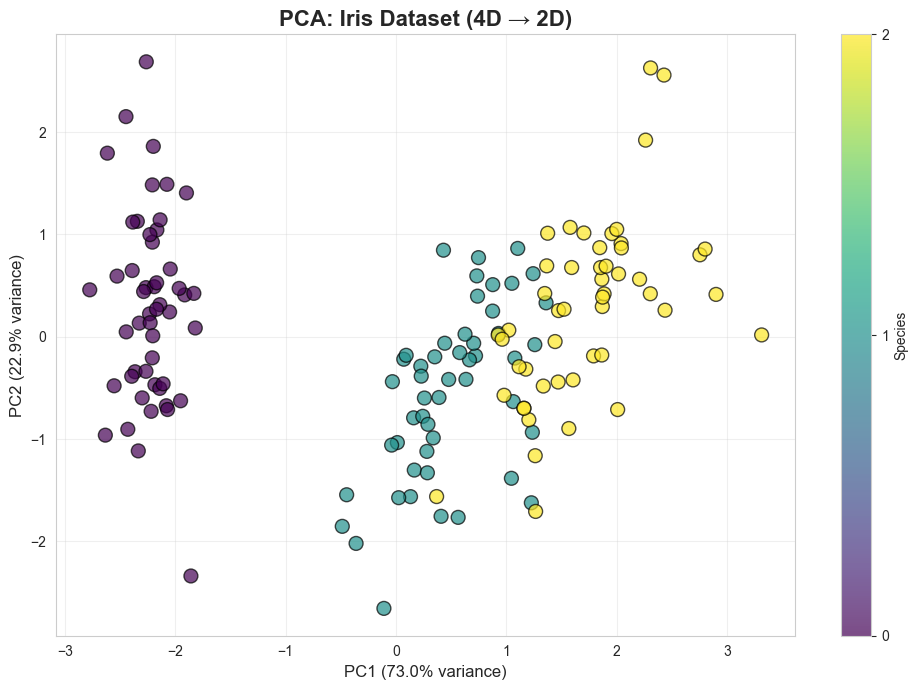


Total variance captured by 2 PCs: 95.81%


In [20]:
# Reduce to 2 components for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                     c=y_iris, cmap='viridis', s=100, 
                     alpha=0.7, edgecolors='k', linewidths=1)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)', 
          fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)', 
          fontsize=12)
plt.title('PCA: Iris Dataset (4D → 2D)', fontsize=16, fontweight='bold')

# Add legend
plt.colorbar(scatter, ticks=[0, 1, 2], label='Species')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nTotal variance captured by 2 PCs: {sum(pca_2d.explained_variance_ratio_)*100:.2f}%")

### 3.4 PCA Feature Importance (Loadings)

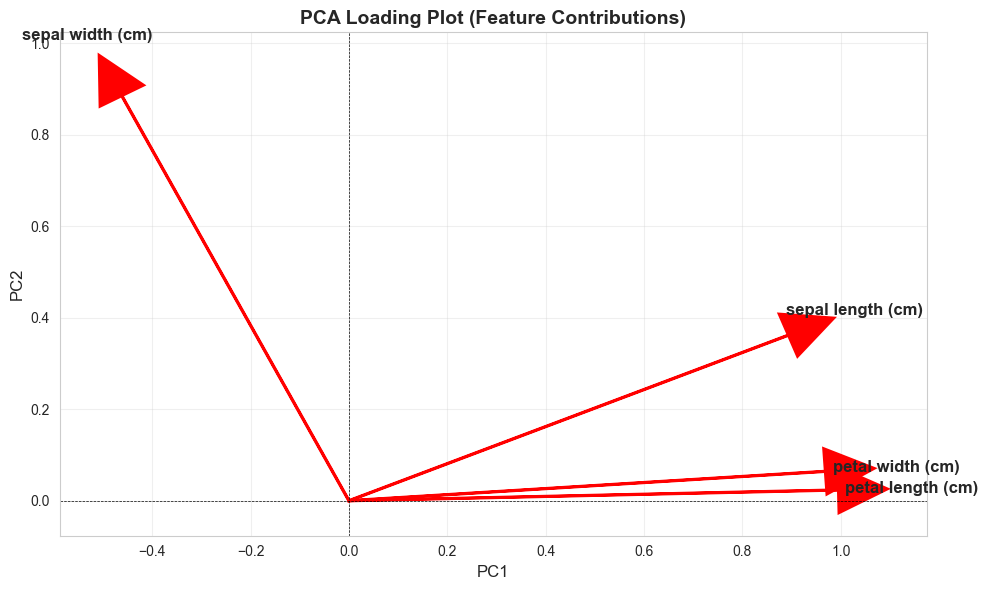

In [21]:
# Get component loadings
loadings = pca_2d.components_.T * np.sqrt(pca_2d.explained_variance_)

# Create loading plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, feature in enumerate(feature_names):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1], 
            head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=2)
    ax.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature, 
           fontsize=12, ha='center', va='center', fontweight='bold')

ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)
ax.set_title('PCA Loading Plot (Feature Contributions)', fontsize=14, fontweight='bold')
ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

 - Petal length and petal width point strongly to the right (high PC1 contribution) and are close together (highly correlated)
- Sepal width points in a different direction, showing it captures different variance
- The arrows act as "weights" showing how the original 4D features combine to create the 2D principal components

---
### 3.5 t-SNE (t-Distributed Stochastic Neighbor Embedding)

**t-SNE** is a non-linear dimensionality reduction technique particularly good for visualization.

**Key Points:**
- Preserves **local structure** (nearby points stay nearby)
- Better for visualization than PCA for complex data
- Computationally expensive
- Perplexity parameter affects results (typically 5-50)

In [22]:
# Load MNIST digits dataset (64 features)
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Take a subset for faster computation
n_samples = 1000
indices = np.random.choice(len(X_digits), n_samples, replace=False)
X_subset = X_digits[indices]
y_subset = y_digits[indices]

# Standardize
X_subset_scaled = StandardScaler().fit_transform(X_subset)

print(f"Digits dataset shape: {X_subset.shape}")
print(f"Classes: {np.unique(y_subset)}")

Digits dataset shape: (1000, 64)
Classes: [0 1 2 3 4 5 6 7 8 9]


Computing t-SNE with perplexity=5...
Computing t-SNE with perplexity=30...
Computing t-SNE with perplexity=50...


/var/folders/x9/g11f20ps45b0l8hqg5022bnr0000gp/T/ipykernel_99876/1400820577.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


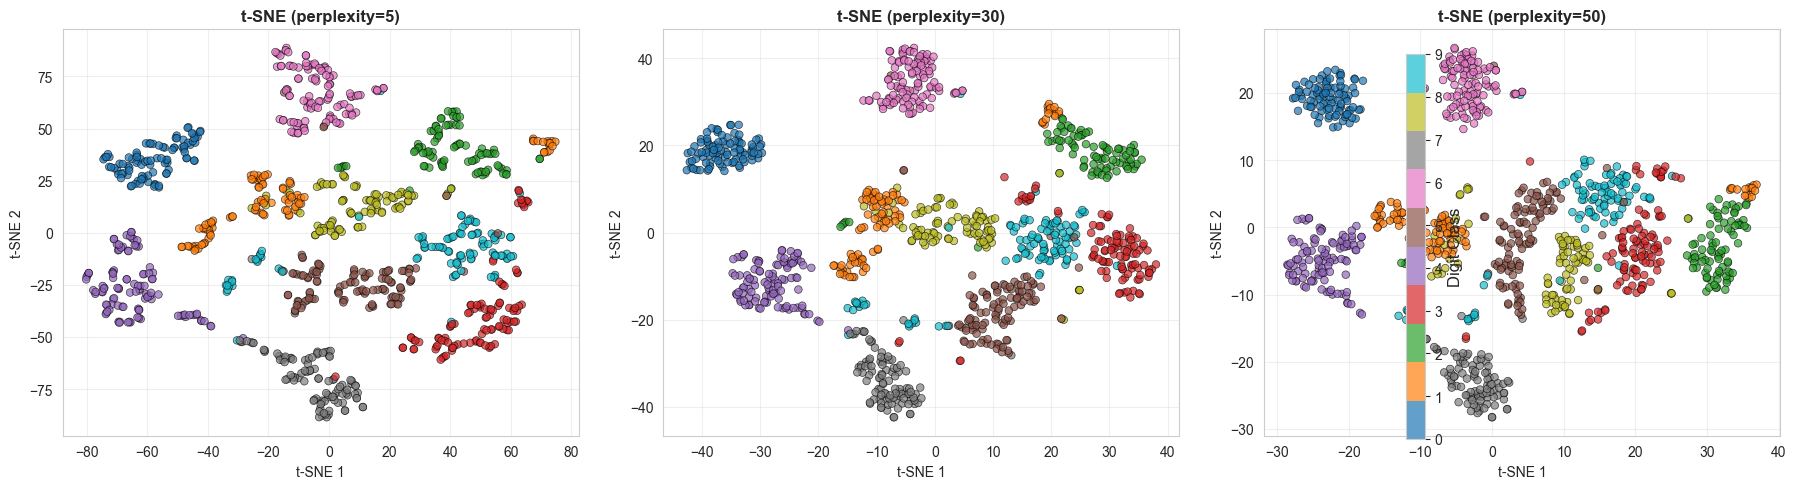

In [23]:
# Apply t-SNE with different perplexity values
perplexity_values = [5, 30, 50]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, perplexity in enumerate(perplexity_values):
    print(f"Computing t-SNE with perplexity={perplexity}...")
    
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, verbose=0)
    X_tsne = tsne.fit_transform(X_subset_scaled)
    
    scatter = axes[idx].scatter(X_tsne[:, 0], X_tsne[:, 1], 
                               c=y_subset, cmap='tab10', s=30, 
                               alpha=0.7, edgecolors='k', linewidths=0.5)
    axes[idx].set_title(f't-SNE (perplexity={perplexity})', 
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('t-SNE 1')
    axes[idx].set_ylabel('t-SNE 2')
    axes[idx].grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes, ticks=range(10))
cbar.set_label('Digit Class', fontsize=12)

plt.tight_layout()
plt.show()

---
### 3.6 UMAP (Uniform Manifold Approximation and Projection)

**UMAP** is similar to t-SNE but:
- **Faster** than t-SNE
- Better preserves **global structure**
- More scalable for large datasets

**Note:** UMAP requires installation: `pip install umap-learn`

In [24]:
# Try to import UMAP
try:
    import umap
    umap_available = True
    print("✓ UMAP is available")
except ImportError:
    umap_available = False
    print("⚠️ UMAP not installed. Run: pip install umap-learn")
    print("Continuing without UMAP...")

/Users/ksarma/mlops-course/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✓ UMAP is available


Computing UMAP...


/Users/ksarma/mlops-course/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


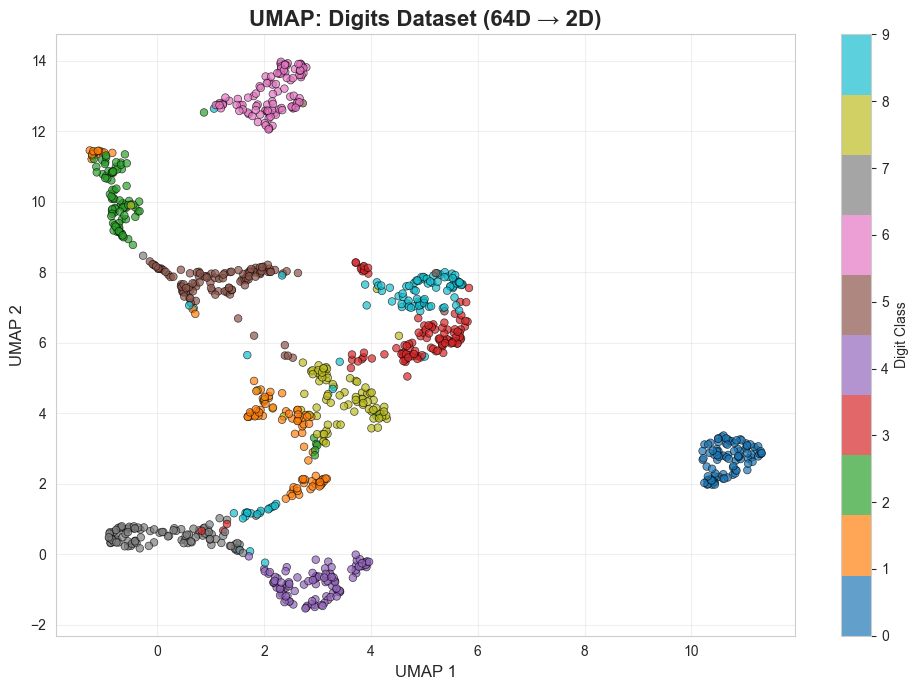

In [26]:
if umap_available:
    # Apply UMAP
    print("Computing UMAP...")
    umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=15)
    X_umap = umap_model.fit_transform(X_subset_scaled)
    
    # Plot UMAP
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], 
                         c=y_subset, cmap='tab10', s=30, 
                         alpha=0.7, edgecolors='k', linewidths=0.5)
    plt.xlabel('UMAP 1', fontsize=12)
    plt.ylabel('UMAP 2', fontsize=12)
    plt.title('UMAP: Digits Dataset (64D → 2D)', fontsize=16, fontweight='bold')
    plt.colorbar(scatter, ticks=range(10), label='Digit Class')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Skipping UMAP visualization (not installed)")

---
### 3.7 Comparison: PCA vs t-SNE vs UMAP

Computing PCA...
Computing t-SNE...
Computing UMAP...


/Users/ksarma/mlops-course/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/var/folders/x9/g11f20ps45b0l8hqg5022bnr0000gp/T/ipykernel_99876/4189646628.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


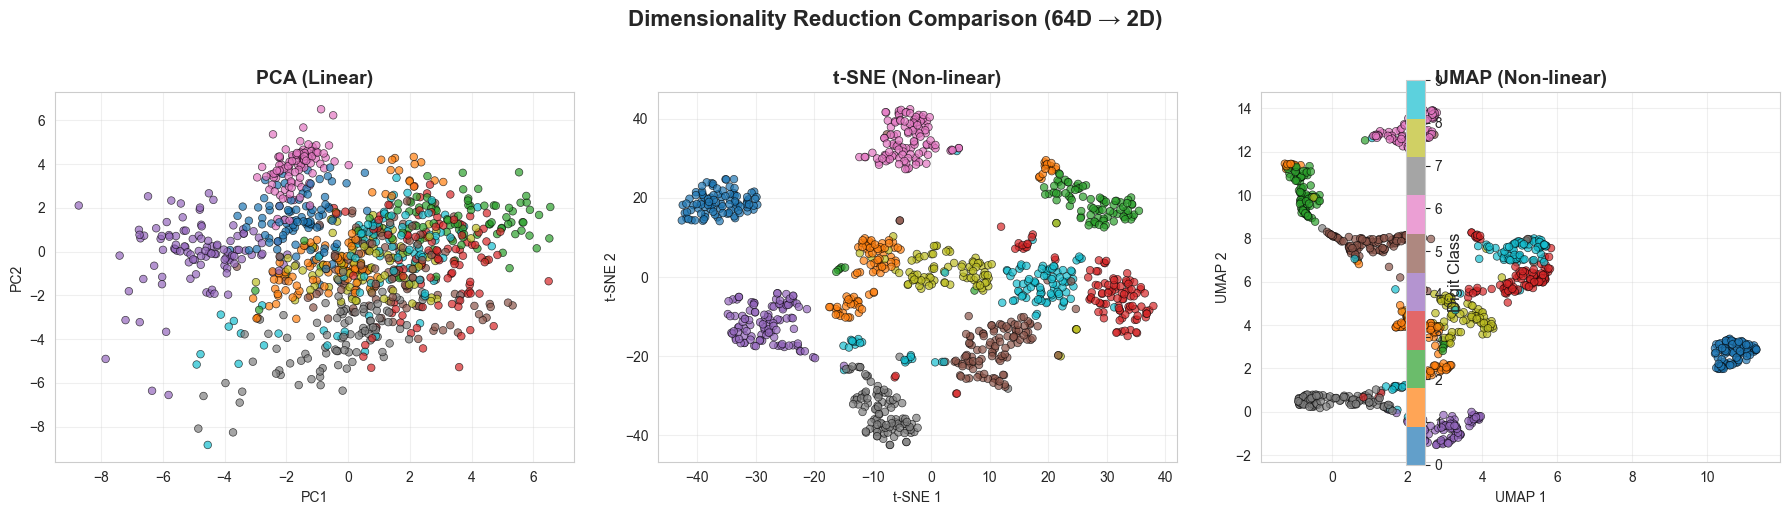

In [27]:
# Compare all three methods
fig, axes = plt.subplots(1, 3 if umap_available else 2, figsize=(18 if umap_available else 12, 5))

# PCA
print("Computing PCA...")
pca_digits = PCA(n_components=2, random_state=42)
X_pca_digits = pca_digits.fit_transform(X_subset_scaled)

scatter1 = axes[0].scatter(X_pca_digits[:, 0], X_pca_digits[:, 1], 
                          c=y_subset, cmap='tab10', s=30, 
                          alpha=0.7, edgecolors='k', linewidths=0.5)
axes[0].set_title('PCA (Linear)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True, alpha=0.3)

# t-SNE
print("Computing t-SNE...")
tsne_digits = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne_digits = tsne_digits.fit_transform(X_subset_scaled)

scatter2 = axes[1].scatter(X_tsne_digits[:, 0], X_tsne_digits[:, 1], 
                          c=y_subset, cmap='tab10', s=30, 
                          alpha=0.7, edgecolors='k', linewidths=0.5)
axes[1].set_title('t-SNE (Non-linear)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].grid(True, alpha=0.3)

# UMAP (if available)
if umap_available:
    print("Computing UMAP...")
    umap_digits = umap.UMAP(n_components=2, random_state=42)
    X_umap_digits = umap_digits.fit_transform(X_subset_scaled)
    
    scatter3 = axes[2].scatter(X_umap_digits[:, 0], X_umap_digits[:, 1], 
                              c=y_subset, cmap='tab10', s=30, 
                              alpha=0.7, edgecolors='k', linewidths=0.5)
    axes[2].set_title('UMAP (Non-linear)', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('UMAP 1')
    axes[2].set_ylabel('UMAP 2')
    axes[2].grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter1 if not umap_available else scatter3, 
                    ax=axes, ticks=range(10))
cbar.set_label('Digit Class', fontsize=12)

plt.suptitle('Dimensionality Reduction Comparison (64D → 2D)', 
            fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## Summary

### K-Means Clustering:
- ✅ **Objective Function**: Minimize within-cluster sum of squares (WCSS/Inertia)
- ✅ **Elbow Method**: Find optimal K where adding more clusters gives diminishing returns
- ✅ **Silhouette Score**: Measure cluster quality (-1 to 1, higher is better)

### Hierarchical Clustering:
- ✅ **Agglomerative**: Bottom-up approach, merging closest clusters
- ✅ **Dendrograms**: Tree visualization of cluster hierarchy
- ✅ **Linkage Methods**: Single, Complete, Average, Ward

### Dimensionality Reduction:
- ✅ **PCA**: Linear method, preserves global variance, fast
- ✅ **t-SNE**: Non-linear, preserves local structure, good for visualization
- ✅ **UMAP**: Non-linear, faster than t-SNE, preserves both local and global structure

### When to Use What?

| Task | Method | Reason |
|------|--------|--------|
| Feature reduction for ML | PCA | Fast, interpretable, preserves variance |
| Data visualization | t-SNE or UMAP | Better separation of clusters |
| Large datasets | PCA or UMAP | Computational efficiency |
| Hierarchical relationships | Hierarchical Clustering | Shows cluster merging process |
| Spherical clusters | K-Means | Fast and efficient |
| Arbitrary shapes | Hierarchical/DBSCAN | More flexible |

---